# Module import

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import os, glob
from PIL import Image
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
os.getenv('HOME')

'/home/aiffel-004'

In [5]:
# convert png -> jpg
def convert_png_to_jpg(img_path):
    images = glob.glob(img_path + "/*.png")
    for img in images:
        img_open = Image.open(img)
        img_open.save(img[:-4]+".jpg")

In [5]:
image_path = os.getenv("HOME") + "/Documents/aiffel_project/AIFFEL/Exploration1/rock_scissor_paper/train/*"

In [ ]:
convert_png_to_jpg(image_path)

In [7]:
def delete_png(img_path):
    images = glob.glob(img_path + "/*.png")
    for img in images:
        os.remove(img)

In [8]:
delete_png(image_path)

In [6]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 112x112 사이즈로 바꾸어 저장합니다.
	target_size=(112,112)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

In [7]:
# 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
resize_images(image_path)

print("가위, 바위, 보 이미지 resize 완료!")

2188  images to be resized.
2188  images resized.
가위, 바위, 보 이미지 resize 완료!


In [6]:
def load_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 바위 : 0, 보 : 1, 가위 : 2
    img_size=112
    color=3
    #이미지 데이터와 라벨(바위 : 0, 가위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 바위 : 0
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 보 : 1
        idx=idx+1
        
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 가위 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/Documents/aiffel_project/AIFFEL/Exploration1/rock_scissor_paper/train"
(x_train, y_train)=load_data(image_dir_path, len(glob.glob(image_path+"/*")))
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 2188 입니다.
x_train shape: (2188, 112, 112, 3)
y_train shape: (2188,)


라벨:  1


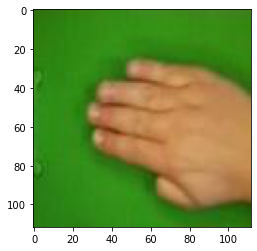

In [7]:
plt.imshow(x_train[1000])
print('라벨: ', y_train[1000])

In [8]:
# model(LeNet)
tf.random.set_seed(1234)
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(112,112,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                692256    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

In [9]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=15)

Epoch 1/15
69/69 [==============================] - 5s 77ms/step - loss: 0.7332 - accuracy: 0.6805
Epoch 2/15
69/69 [==============================] - 0s 7ms/step - loss: 0.3487 - accuracy: 0.8780
Epoch 3/15
69/69 [==============================] - 0s 7ms/step - loss: 0.2032 - accuracy: 0.9333
Epoch 4/15
69/69 [==============================] - 0s 7ms/step - loss: 0.1211 - accuracy: 0.9616
Epoch 5/15
69/69 [==============================] - 0s 7ms/step - loss: 0.0875 - accuracy: 0.9721
Epoch 6/15
69/69 [==============================] - 0s 7ms/step - loss: 0.0641 - accuracy: 0.9803
Epoch 7/15
69/69 [==============================] - 1s 8ms/step - loss: 0.0386 - accuracy: 0.9886
Epoch 8/15
69/69 [==============================] - 0s 7ms/step - loss: 0.0240 - accuracy: 0.9945
Epoch 9/15
69/69 [==============================] - 0s 7ms/step - loss: 0.0197 - accuracy: 0.9950
Epoch 10/15
69/69 [==============================] - 0s 6ms/step - loss: 0.0221 - accuracy: 0.9950
Epoch 11/15
69/69 

In [7]:
# TEST image
test_image_path = os.getenv("HOME") + "/Documents/aiffel_project/AIFFEL/Exploration1/rock_scissor_paper/test/*"

In [22]:
resize_images(test_image_path)

4285  images to be resized.
4285  images resized.


In [8]:
def load_test_data(img_path, number_of_data):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 바위 : 0, 보 : 1, 가위 : 2
    img_size=112
    color=3
    #이미지 데이터와 라벨(바위 : 0, 가위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 바위 : 0
        idx=idx+1
        
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 보 : 1
        idx=idx+1
    
    for file in glob.iglob(img_path+'/scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 가위 : 2
        idx=idx+1
     
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

test_dir_path = os.getenv("HOME") + "/Documents/aiffel_project/AIFFEL/Exploration1/rock_scissor_paper/test"
(x_test, y_test)=load_test_data(test_dir_path, len(glob.glob(test_image_path+'/*')))
x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 4285 입니다.
x_test shape: (4285, 112, 112, 3)
y_test shape: (4285,)


In [12]:
# evaluate test images
test_loss, test_acc = model.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 4s - loss: 4.3788 - accuracy: 0.3027


예측확률분포: [0.5819576  0.09738161 0.32066074]
라벨: 2, 예측결과: 0


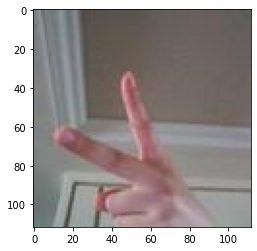

예측확률분포: [0.10450358 0.8935067  0.00198969]
라벨: 0, 예측결과: 1


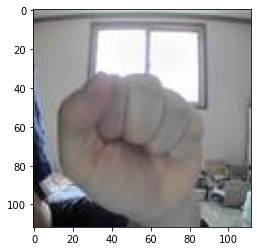

예측확률분포: [3.2749827e-05 4.7261350e-02 9.5270592e-01]
라벨: 1, 예측결과: 2


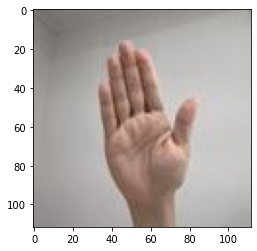

예측확률분포: [2.8875513e-05 9.7715729e-01 2.2813827e-02]
라벨: 0, 예측결과: 1


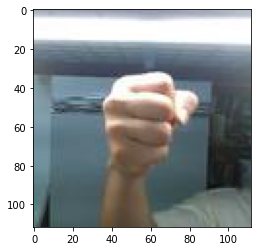

예측확률분포: [9.9999225e-01 7.6939068e-06 2.7970664e-09]
라벨: 1, 예측결과: 0


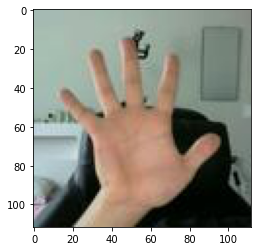

In [13]:
import random
### 어떠한 정보를 잘못예측하는지 알아보기 ###
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
# print(predicted_result.shape) # (300, 3)
predicted_labels = np.argmax(predicted_result, axis=1)
# print(predicted_labels.shape) # (300, )

wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)


# 5개만 추출
samples = random.choices(population=wrong_predict_list, k=5)
for n in samples:
    # print(n)
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 현 시점에서 생각해볼 수 있는 부분
### 학습이 전혀 되고 있지 않은 듯 하다.. why?

- 저해상도 이미지를 학습시켜서 발생하는 issue인가?
- trainset이 너무 적었다 (Overfitting)
- trainset과 testset의 분포의 괴리가 너무 크다
- 모델에서 특징을 잡는 파라미터를 너무 작게 잡았다

# Additional Training

### 1 - 1) trainset이 너무 적다 --> 추가 학습 시행

In [9]:
import tensorflow_datasets as tfds

In [20]:
print(tfds.list_builders())

2022-09-04 18:03:49.982847: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Failed precondition: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Couldn't resolve host 'metadata'".


['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset', 'ai2_arc', 'ai2_arc_with_ir', 'amazon_us_reviews', 'anli', 'answer_equivalence', 'arc', 'asqa', 'asset', 'assin2', 'bair_robot_pushing_small', 'bccd', 'beans', 'bee_dataset', 'beir', 'big_patent', 'bigearthnet', 'billsum', 'binarized_mnist', 'binary_alpha_digits', 'ble_wind_field', 'blimp', 'booksum', 'bool_q', 'c4', 'caltech101', 'caltech_birds2010', 'caltech_birds2011', 'cardiotox', 'cars196', 'cassava', 'cats_vs_dogs', 'celeb_a', 'celeb_a_hq', 'cfq', 'cherry_blossoms', 'chexpert', 'cifar10', 'cifar100', 'cifar10_1', 'cifar10_corrupted', 'citrus_leaves', 'cityscapes', 'civil_comments', 'clevr', 'clic', 'clinc_oos', 'cmaterdb', 'cnn_dailymail', 'coco', 'coco_captions', 'coil100', 'colorectal_histology', 'colorectal_histology_large', 'common_voice', 'coqa', 'cos_e', 'cosmos_qa', 'covid19', 'covid19sum', 'crema_d', 'criteo', 'cs_restaurants', 'curated_breast_imaging_ddsm', 'cycle_gan', 'd4rl_adroit_door', 'd4rl_ad

In [10]:
DATASET_NAME = 'rock_paper_scissors'

(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    name=DATASET_NAME,
    data_dir='tmp',
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)

In [11]:
print('Raw train dataset:', dataset_train_raw)
print('Raw train dataset size:', len(list(dataset_train_raw)), '\n')

print('Raw test dataset:', dataset_test_raw)
print('Raw test dataset size:', len(list(dataset_test_raw)), '\n')

Raw train dataset: <PrefetchDataset shapes: ((300, 300, 3), ()), types: (tf.uint8, tf.int64)>
Raw train dataset size: 2520 

Raw test dataset: <PrefetchDataset shapes: ((300, 300, 3), ()), types: (tf.uint8, tf.int64)>
Raw test dataset size: 372 



In [23]:
dataset_info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_path='tmp/rock_paper_scissors/3.0.0',
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

In [11]:
NUM_TRAIN_EXAMPLES = dataset_info.splits['train'].num_examples
NUM_TEST_EXAMPLES = dataset_info.splits['test'].num_examples
NUM_CLASSES = dataset_info.features['label'].num_classes

print('Number of TRAIN examples:', NUM_TRAIN_EXAMPLES)
print('Number of TEST examples:', NUM_TEST_EXAMPLES)
print('Number of label classes:', NUM_CLASSES)

Number of TRAIN examples: 2520
Number of TEST examples: 372
Number of label classes: 3


In [12]:
# Function to convert label ID to labels string.
get_label_name = dataset_info.features['label'].int2str

In [26]:
print(get_label_name(0));
print(get_label_name(1));
print(get_label_name(2));

rock
paper
scissors


The old signature is deprecated and will be removed. Please change your call to `tfds.show_examples(ds, info)`


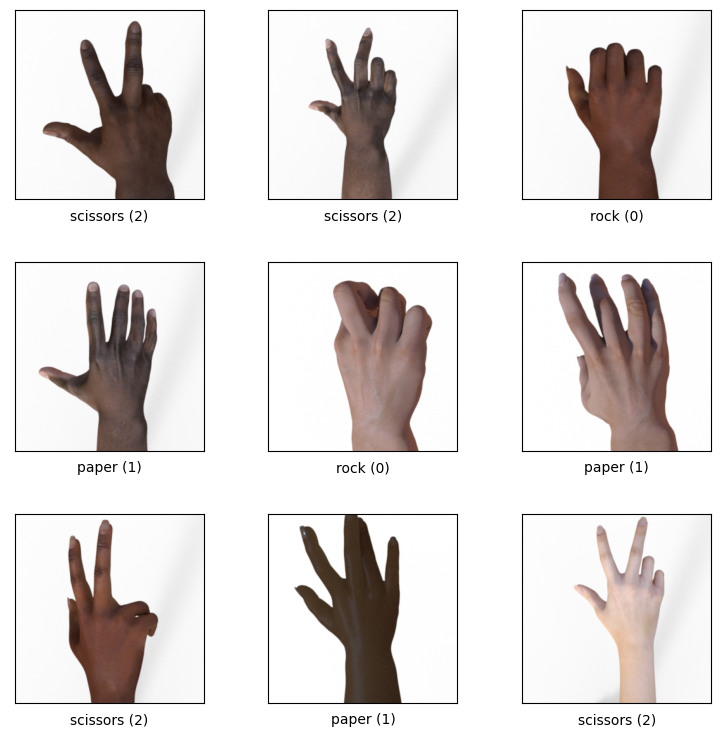

In [27]:
fig = tfds.show_examples(dataset_info, dataset_train_raw)

In [13]:
def format_example(image, label):
    # Make image color values to be float.
    image = tf.cast(image, tf.float32)
    # Make image color values to be in [0..1] range.
    image = image / 255.
    # Make sure that image has a right size
    image = tf.image.resize(image, [112, 112])
    return image, label

In [14]:
dataset_train = dataset_train_raw.map(format_example)
dataset_test = dataset_test_raw.map(format_example)

In [15]:
BATCH_SIZE = 32

dataset_train = dataset_train.shuffle(
    buffer_size=NUM_TRAIN_EXAMPLES
)

dataset_train = dataset_train.batch(
    batch_size=BATCH_SIZE
)

# Prefetch will enable the input pipeline to asynchronously fetch batches while your model is training.
dataset_train = dataset_train.prefetch(
    buffer_size=tf.data.experimental.AUTOTUNE
)

dataset_test_shuffled = dataset_test.batch(BATCH_SIZE)

Label batch shape: (32,) 

Image batch shape: (32, 112, 112, 3) 

Label batch: [2 1 1 1 0 2 0 2 2 1 2 2 2 0 0 0 1 1 1 0 1 1 0 2 0 1 2 1 1 0 2 1] 

First batch image: [[[0.9955495  0.9955495  0.9955495 ]
  [0.99437404 0.99437404 0.99437404]
  [0.9954482  0.9954482  0.9954482 ]
  ...
  [0.9869586  0.9869586  0.9869586 ]
  [0.9882353  0.9882353  0.9882353 ]
  [0.98315454 0.98315454 0.98315454]]

 [[0.99607843 0.99607843 0.99607843]
  [0.993136   0.993136   0.993136  ]
  [0.9936762  0.9936762  0.9936762 ]
  ...
  [0.9858331  0.9858331  0.9858331 ]
  [0.9882353  0.9882353  0.9882353 ]
  [0.9827268  0.9827268  0.9827268 ]]

 [[0.9954319  0.9954319  0.9954319 ]
  [0.9944466  0.9944466  0.9944466 ]
  [0.99339485 0.99339485 0.99339485]
  ...
  [0.9849327  0.9849327  0.9849327 ]
  [0.9826819  0.9826819  0.9826819 ]
  [0.98695856 0.98695856 0.98695856]]

 ...

 [[0.9915266  0.9915266  0.9915266 ]
  [0.9858331  0.9858331  0.9858331 ]
  [0.9893784  0.9893784  0.9893784 ]
  ...
  [0.9750814  0.97508

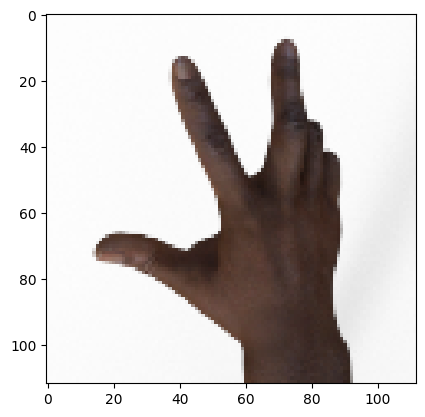

In [31]:
# Debugging the batches using conversion to Numpy arrays.
batches = tfds.as_numpy(dataset_train)
for batch in batches:
    image_batch, label_batch = batch
    print('Label batch shape:', label_batch.shape, '\n')
    print('Image batch shape:', image_batch.shape, '\n')
    print('Label batch:', label_batch, '\n')
    
    for batch_item_index in range(len(image_batch)):
        print('First batch image:', image_batch[batch_item_index], '\n')
        plt.imshow(image_batch[batch_item_index])
        plt.show()
        # Break to shorten the output.
        break
    # Break to shorten the output.
    break

In [20]:
steps_per_epoch = NUM_TRAIN_EXAMPLES // BATCH_SIZE
validation_steps = NUM_TEST_EXAMPLES // BATCH_SIZE

print('steps_per_epoch:', steps_per_epoch)
print('validation_steps:', validation_steps)

steps_per_epoch: 78
validation_steps: 11


In [23]:
training_history = model.fit(
    x=dataset_train.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/15
78/78 [==============================] - 1s 11ms/step - loss: 1.2841 - accuracy: 0.3425 - val_loss: 1.0986 - val_accuracy: 0.3324
Epoch 2/15
78/78 [==============================] - 2s 20ms/step - loss: 1.0988 - accuracy: 0.3296 - val_loss: 1.0986 - val_accuracy: 0.3324
Epoch 3/15
78/78 [==============================] - 2s 26ms/step - loss: 1.0987 - accuracy: 0.3320 - val_loss: 1.0986 - val_accuracy: 0.3324
Epoch 4/15
78/78 [==============================] - 2s 27ms/step - loss: 1.0987 - accuracy: 0.3223 - val_loss: 1.0986 - val_accuracy: 0.3324
Epoch 5/15
78/78 [==============================] - 2s 23ms/step - loss: 1.0987 - accuracy: 0.3268 - val_loss: 1.0986 - val_accuracy: 0.3352
Epoch 6/15
78/78 [==============================] - 2s 24ms/step - loss: 1.0988 - accuracy: 0.3159 - val_loss: 1.0986 - val_accuracy: 0.3352
Epoch 7/15
78/78 [==============================] - 1s 19ms/step - loss: 1.0988 - accuracy: 0.3203 - val_loss: 1.0986 - val_accuracy: 0.3324
Epoch 8/15
78

In [24]:
# evaluate test images
test_loss, test_acc = model.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 1s - loss: 1.0968 - accuracy: 0.3300


In [36]:
def render_training_history(training_history):
    loss = training_history.history['loss']

    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

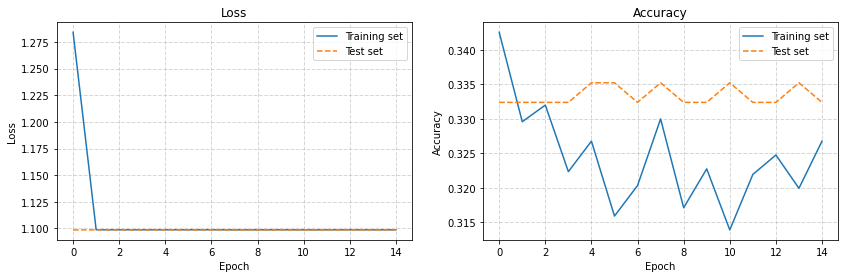

In [26]:
render_training_history(training_history)

### 1 - 2) trainset이 너무 적다 --> Data Augmentation

In [24]:
def augment_flip(image: tf.Tensor) -> tf.Tensor:
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image

In [25]:
def augment_color(image: tf.Tensor) -> tf.Tensor:
    image = tf.image.random_hue(image, max_delta=0.08)
    image = tf.image.random_saturation(image, lower=0.7, upper=1.3)
    image = tf.image.random_brightness(image, 0.05)
    image = tf.image.random_contrast(image, lower=0.8, upper=1)
    image = tf.clip_by_value(image, clip_value_min=0, clip_value_max=1)
    return image

In [26]:
def augment_rotation(image: tf.Tensor) -> tf.Tensor:
    # Rotate 0, 90, 180, 270 degrees
    return tf.image.rot90(
        image,
        tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
    )

In [27]:
def augment_inversion(image: tf.Tensor) -> tf.Tensor:
    random = tf.random.uniform(shape=[], minval=0, maxval=1)
    if random > 0.5:
        image = tf.math.multiply(image, -1)
        image = tf.math.add(image, 1)
    return image

In [28]:
def augment_zoom(image: tf.Tensor, min_zoom=0.8, max_zoom=1.0) -> tf.Tensor:
    image_width, image_height, image_colors = image.shape
    crop_size = (image_width, image_height)

    # Generate crop settings, ranging from a 1% to 20% crop.
    scales = list(np.arange(min_zoom, max_zoom, 0.01))
    boxes = np.zeros((len(scales), 4))

    for i, scale in enumerate(scales):
        x1 = y1 = 0.5 - (0.5 * scale)
        x2 = y2 = 0.5 + (0.5 * scale)
        boxes[i] = [x1, y1, x2, y2]

    def random_crop(img):
        # Create different crops for an image
        crops = tf.image.crop_and_resize(
            [img],
            boxes=boxes,
            box_indices=np.zeros(len(scales)),
            crop_size=crop_size
        )
        # Return a random crop
        return crops[tf.random.uniform(shape=[], minval=0, maxval=len(scales), dtype=tf.int32)]

    choice = tf.random.uniform(shape=[], minval=0., maxval=1., dtype=tf.float32)

    # Only apply cropping 50% of the time
    return tf.cond(choice < 0.5, lambda: image, lambda: random_crop(image))

In [29]:
def augment_data(image, label):
    image = augment_flip(image)
    image = augment_color(image)
    image = augment_rotation(image)
    # image = augment_zoom(image)
    image = augment_inversion(image)
    return image, label

In [30]:
dataset_train = dataset_train_raw.map(format_example)
dataset_test = dataset_test_raw.map(format_example)

In [31]:
dataset_train_augmented = dataset_train.map(augment_data)

In [35]:
def preview_dataset(dataset):
    plt.figure(figsize=(12, 12))
    plot_index = 0
    for features in dataset.take(12):
        (image, label) = features
        plot_index += 1
        plt.subplot(3, 4, plot_index)
        # plt.axis('Off')
        # print(label)
        # print(label.numpy())
        label = get_label_name(label.numpy())
        plt.title('Label: %s' % label)
        plt.imshow(image.numpy())

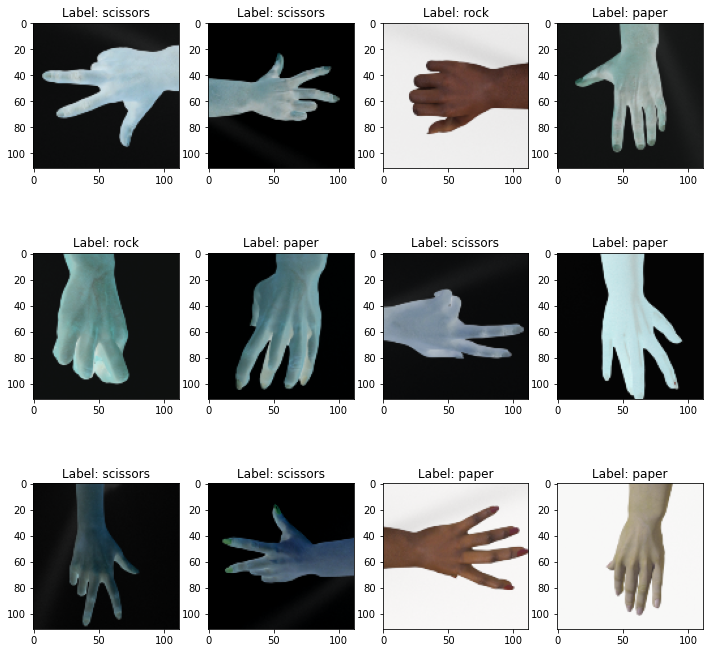

In [38]:
# Explore augmented training dataset.
preview_dataset(dataset_train_augmented)

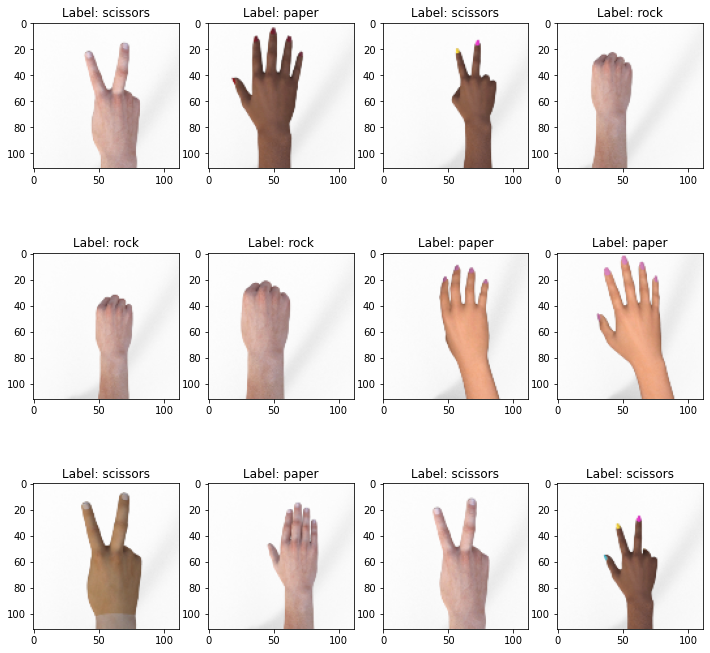

In [39]:
# Explore test dataset.
preview_dataset(dataset_test)

In [32]:
BATCH_SIZE = 32

dataset_train_augmented = dataset_train_augmented.shuffle(
    buffer_size=NUM_TRAIN_EXAMPLES
)

dataset_train_augmented = dataset_train_augmented.batch(
    batch_size=BATCH_SIZE
)

# Prefetch will enable the input pipeline to asynchronously fetch batches while your model is training.
dataset_train_augmented = dataset_train_augmented.prefetch(
    buffer_size=tf.data.experimental.AUTOTUNE
)

dataset_test_shuffled = dataset_test.batch(BATCH_SIZE)

In [41]:
training_history = model.fit(
    x=dataset_train_augmented.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/15
78/78 [==============================] - 1s 9ms/step - loss: 1.0812 - accuracy: 0.3654 - val_loss: 1.0987 - val_accuracy: 0.3352
Epoch 2/15
78/78 [==============================] - 3s 34ms/step - loss: 1.0124 - accuracy: 0.4795 - val_loss: 1.0802 - val_accuracy: 0.3352
Epoch 3/15
78/78 [==============================] - 2s 30ms/step - loss: 0.9237 - accuracy: 0.5470 - val_loss: 1.0526 - val_accuracy: 0.3949
Epoch 4/15
78/78 [==============================] - 3s 35ms/step - loss: 0.8643 - accuracy: 0.5872 - val_loss: 0.9963 - val_accuracy: 0.4915
Epoch 5/15
78/78 [==============================] - 3s 44ms/step - loss: 0.8190 - accuracy: 0.6137 - val_loss: 0.9039 - val_accuracy: 0.5909
Epoch 6/15
78/78 [==============================] - 3s 42ms/step - loss: 0.7785 - accuracy: 0.6355 - val_loss: 0.9378 - val_accuracy: 0.5028
Epoch 7/15
78/78 [==============================] - 3s 37ms/step - loss: 0.7385 - accuracy: 0.6588 - val_loss: 0.8810 - val_accuracy: 0.5710
Epoch 8/15
78/

In [42]:
# evaluate test images
test_loss, test_acc = model.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 1s - loss: 2.9753 - accuracy: 0.4506


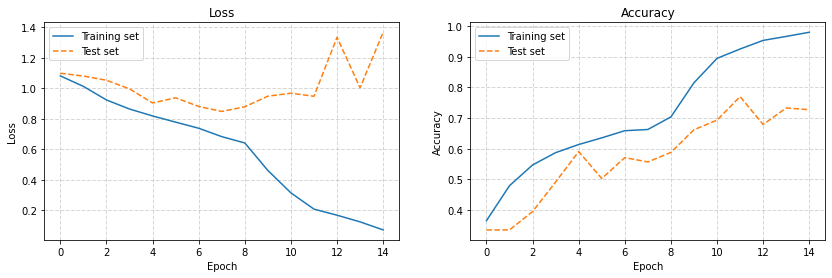

In [43]:
render_training_history(training_history)

### 2) 모델에서 특징을 잡는 파라미터를 너무 작게 잡았다 -> 모델 파라미터 재조정

In [16]:
# model(LeNet)
tf.random.set_seed(1234)
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(112, 112, 3)))
model2.add(keras.layers.MaxPool2D(2, 2))
model2.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(keras.layers.MaxPool2D(2, 2))
model2.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(keras.layers.MaxPool2D(2, 2))

model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(64, activation='relu'))
model2.add(keras.layers.Dense(32, activation='relu'))
model2.add(keras.layers.Dense(3, activation='softmax'))

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 110, 110, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 53, 53, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [17]:
model2.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model2.fit(x_train_norm, y_train, epochs=15)

Epoch 1/15
69/69 [==============================] - 12s 169ms/step - loss: 0.6256 - accuracy: 0.7358
Epoch 2/15
69/69 [==============================] - 0s 7ms/step - loss: 0.1992 - accuracy: 0.9328
Epoch 3/15
69/69 [==============================] - 0s 7ms/step - loss: 0.0939 - accuracy: 0.9644
Epoch 4/15
69/69 [==============================] - 0s 7ms/step - loss: 0.0749 - accuracy: 0.9749
Epoch 5/15
69/69 [==============================] - 0s 7ms/step - loss: 0.0374 - accuracy: 0.9913
Epoch 6/15
69/69 [==============================] - 0s 7ms/step - loss: 0.0348 - accuracy: 0.9863
Epoch 7/15
69/69 [==============================] - 0s 7ms/step - loss: 0.0157 - accuracy: 0.9954
Epoch 8/15
69/69 [==============================] - 0s 7ms/step - loss: 0.0246 - accuracy: 0.9936
Epoch 9/15
69/69 [==============================] - 0s 7ms/step - loss: 0.0063 - accuracy: 0.9982
Epoch 10/15
69/69 [==============================] - 0s 7ms/step - loss: 0.0041 - accuracy: 0.9986
Epoch 11/15
69/6

In [18]:
# evaluate test images
test_loss, test_acc = model2.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 7s - loss: 8.4513 - accuracy: 0.2978


In [32]:
BATCH_SIZE = 32

dataset_train = dataset_train.shuffle(
    buffer_size=NUM_TRAIN_EXAMPLES
)

dataset_train = dataset_train.batch(
    batch_size=BATCH_SIZE
)

# Prefetch will enable the input pipeline to asynchronously fetch batches while your model is training.
dataset_train = dataset_train.prefetch(
    buffer_size=tf.data.experimental.AUTOTUNE
)

dataset_test_shuffled = dataset_test.batch(BATCH_SIZE)

In [21]:
training_history = model2.fit(
    x=dataset_train.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/15
78/78 [==============================] - 1s 12ms/step - loss: 0.4751 - accuracy: 0.8349 - val_loss: 1.3229 - val_accuracy: 0.8239
Epoch 2/15
78/78 [==============================] - 1s 18ms/step - loss: 0.0097 - accuracy: 0.9976 - val_loss: 1.5470 - val_accuracy: 0.8381
Epoch 3/15
78/78 [==============================] - 1s 18ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 1.7594 - val_accuracy: 0.8153
Epoch 4/15
78/78 [==============================] - 1s 19ms/step - loss: 3.6794e-04 - accuracy: 1.0000 - val_loss: 1.9567 - val_accuracy: 0.8011
Epoch 5/15
78/78 [==============================] - 1s 18ms/step - loss: 2.1911e-04 - accuracy: 1.0000 - val_loss: 2.0398 - val_accuracy: 0.8153
Epoch 6/15
78/78 [==============================] - 1s 19ms/step - loss: 1.5917e-04 - accuracy: 1.0000 - val_loss: 2.0393 - val_accuracy: 0.8153
Epoch 7/15
78/78 [==============================] - 1s 17ms/step - loss: 1.2489e-04 - accuracy: 1.0000 - val_loss: 2.1175 - val_accuracy: 0.82

In [22]:
# evaluate test images
test_loss, test_acc = model2.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 1s - loss: 5.5949 - accuracy: 0.3939


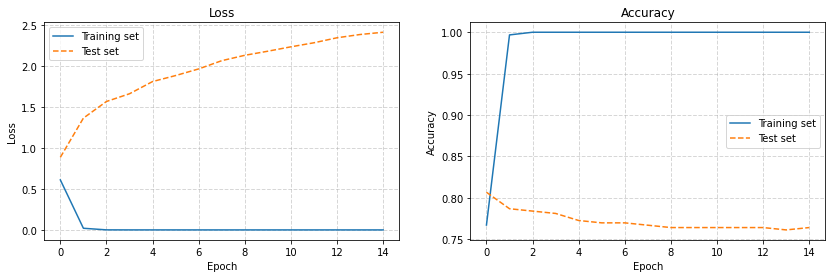

In [45]:
render_training_history(training_history)

In [33]:
training_history = model2.fit(
    x=dataset_train_augmented.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/15
78/78 [==============================] - 1s 10ms/step - loss: 0.9805 - accuracy: 0.5773 - val_loss: 1.0432 - val_accuracy: 0.5426
Epoch 2/15
78/78 [==============================] - 2s 29ms/step - loss: 0.4309 - accuracy: 0.8227 - val_loss: 0.8013 - val_accuracy: 0.7131
Epoch 3/15
78/78 [==============================] - 2s 30ms/step - loss: 0.2384 - accuracy: 0.9092 - val_loss: 0.7053 - val_accuracy: 0.7841
Epoch 4/15
78/78 [==============================] - 5s 67ms/step - loss: 0.1532 - accuracy: 0.9409 - val_loss: 0.4341 - val_accuracy: 0.8239
Epoch 5/15
78/78 [==============================] - 2s 30ms/step - loss: 0.1101 - accuracy: 0.9699 - val_loss: 0.5067 - val_accuracy: 0.7841
Epoch 6/15
78/78 [==============================] - 2s 27ms/step - loss: 0.0724 - accuracy: 0.9783 - val_loss: 0.6168 - val_accuracy: 0.8153
Epoch 7/15
78/78 [==============================] - 2s 27ms/step - loss: 0.0698 - accuracy: 0.9799 - val_loss: 0.6196 - val_accuracy: 0.8011
Epoch 8/15
78

In [34]:
# evaluate test images
test_loss, test_acc = model2.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 1s - loss: 3.3610 - accuracy: 0.4747


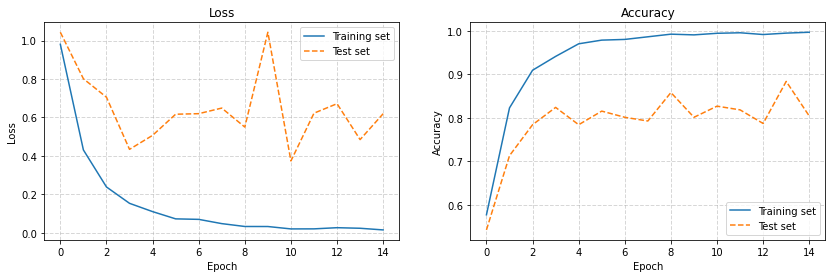

In [37]:
render_training_history(training_history)

### 3-1) 모델(LeNet) 자체의 한계 -> VGG16 Backbone Network

In [55]:
from tensorflow.keras.applications import VGG16

model_vgg = VGG16(weights=None, include_top=False, input_shape=(112, 112, 3))      # vgg16 불러오기
model_vgg.trainable = False                                                        # Backbone 학습x

vgg16 = keras.models.Sequential()
vgg16.add(model_vgg)                                                               # Backbone 모델 추가
vgg16.add(keras.layers.Flatten())                    
vgg16.add(keras.layers.Dense(4096, activation='relu', kernel_regularizer='l2'))    # Classifier 정의
vgg16.add(keras.layers.Dropout(0.5))
vgg16.add(keras.layers.Dense(4096, activation='relu', kernel_regularizer='l2'))    # l2 : l2 Norm
vgg16.add(keras.layers.Dropout(0.5))                                               # Regularization
vgg16.add(keras.layers.Dense(3, activation='softmax'))

vgg16.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 4096)              18878464  
_________________________________________________________________
dropout_2 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_3 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 3)                

In [56]:
EPOCH = 15
vgg16.compile(optimizer='adam',                         
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'], )

history = vgg16.fit(x_train_norm, y_train, epochs=EPOCH)

Epoch 1/15
69/69 [==============================] - 3s 41ms/step - loss: 10.7037 - accuracy: 0.3355
Epoch 2/15
69/69 [==============================] - 3s 41ms/step - loss: 1.1064 - accuracy: 0.3428
Epoch 3/15
69/69 [==============================] - 3s 40ms/step - loss: 1.1011 - accuracy: 0.3405
Epoch 4/15
69/69 [==============================] - 3s 41ms/step - loss: 1.1008 - accuracy: 0.3455
Epoch 5/15
69/69 [==============================] - 3s 40ms/step - loss: 1.1010 - accuracy: 0.3327
Epoch 6/15
69/69 [==============================] - 3s 41ms/step - loss: 1.1010 - accuracy: 0.3208
Epoch 7/15
69/69 [==============================] - 3s 41ms/step - loss: 1.1007 - accuracy: 0.3405
Epoch 8/15
69/69 [==============================] - 3s 41ms/step - loss: 1.1002 - accuracy: 0.3382
Epoch 9/15
69/69 [==============================] - 3s 41ms/step - loss: 1.0990 - accuracy: 0.3441
Epoch 10/15
69/69 [==============================] - 3s 41ms/step - loss: 1.0996 - accuracy: 0.3341
Epoch 11

In [57]:
# evaluate test images
test_loss, test_acc = vgg16.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 5s - loss: 1.0989 - accuracy: 0.3328


In [58]:
training_history = vgg16.fit(
    x=dataset_train.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/15
78/78 [==============================] - 4s 47ms/step - loss: 1.0996 - accuracy: 0.3129 - val_loss: 1.0989 - val_accuracy: 0.3324
Epoch 2/15
78/78 [==============================] - 4s 54ms/step - loss: 1.0992 - accuracy: 0.3296 - val_loss: 1.0988 - val_accuracy: 0.3324
Epoch 3/15
78/78 [==============================] - 4s 54ms/step - loss: 1.0991 - accuracy: 0.3219 - val_loss: 1.0987 - val_accuracy: 0.3324
Epoch 4/15
78/78 [==============================] - 4s 54ms/step - loss: 1.0988 - accuracy: 0.3296 - val_loss: 1.0987 - val_accuracy: 0.3352
Epoch 5/15
78/78 [==============================] - 4s 55ms/step - loss: 1.0990 - accuracy: 0.3352 - val_loss: 1.0987 - val_accuracy: 0.3324
Epoch 6/15
78/78 [==============================] - 4s 55ms/step - loss: 1.0985 - accuracy: 0.3521 - val_loss: 1.0987 - val_accuracy: 0.3352
Epoch 7/15
78/78 [==============================] - 4s 54ms/step - loss: 1.0985 - accuracy: 0.3453 - val_loss: 1.0988 - val_accuracy: 0.3324
Epoch 8/15
78

In [59]:
# evaluate test images
test_loss, test_acc = vgg16.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 5s - loss: 1.0987 - accuracy: 0.3328


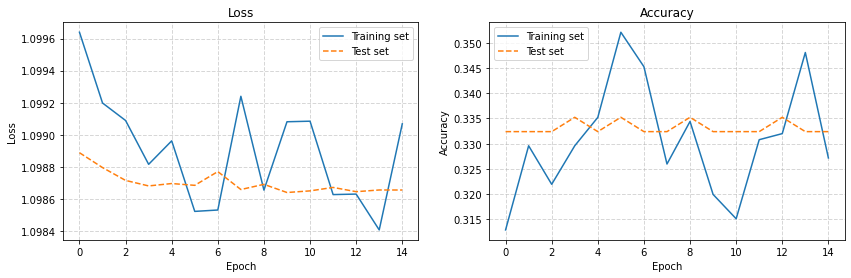

In [60]:
render_training_history(training_history)

In [52]:
training_history = vgg16.fit(
    x=dataset_train_augmented.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/15
78/78 [==============================] - 4s 46ms/step - loss: 1.0984 - accuracy: 0.3425 - val_loss: 1.0986 - val_accuracy: 0.3324
Epoch 2/15
78/78 [==============================] - 6s 74ms/step - loss: 1.0989 - accuracy: 0.3509 - val_loss: 1.0986 - val_accuracy: 0.3324
Epoch 3/15
78/78 [==============================] - 6s 71ms/step - loss: 1.0990 - accuracy: 0.3099 - val_loss: 1.0986 - val_accuracy: 0.3352
Epoch 4/15
78/78 [==============================] - 6s 76ms/step - loss: 1.0986 - accuracy: 0.3396 - val_loss: 1.0986 - val_accuracy: 0.3324
Epoch 5/15
78/78 [==============================] - 7s 90ms/step - loss: 1.0985 - accuracy: 0.3416 - val_loss: 1.0986 - val_accuracy: 0.3324
Epoch 6/15
78/78 [==============================] - 6s 71ms/step - loss: 1.0988 - accuracy: 0.3356 - val_loss: 1.0987 - val_accuracy: 0.3324
Epoch 7/15
78/78 [==============================] - 6s 72ms/step - loss: 1.0988 - accuracy: 0.3364 - val_loss: 1.0986 - val_accuracy: 0.3324
Epoch 8/15
78

In [53]:
# evaluate test images
test_loss, test_acc = vgg16.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 5s - loss: 1.0986 - accuracy: 0.3328


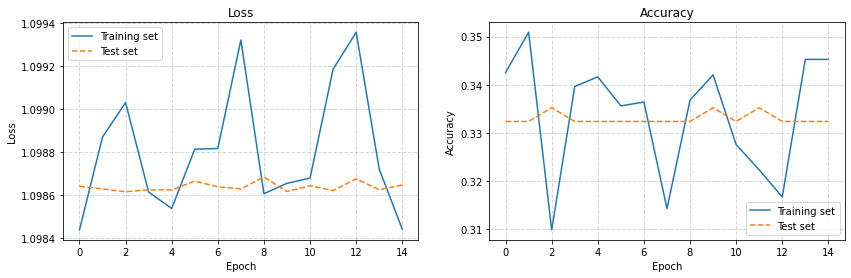

In [54]:
render_training_history(training_history)

## 이쯤에서 생각해볼 수 있는 부분
### 학습이 전혀 되고 있지 않은 듯 하다.. why?

- 학습 데이터 셋에 문제가 있는건가? (왜지..? 진짜 그냥 trainset 데이터가 단순해서?!)
- LeNet 모델의 한계로는 보이지 않음 (VGG도 성능이 좋지 않기에..)

### 3 - 2) 모델(LeNet) 자체의 한계 -> VGG16 Backbone Network (Transfer Learning)

In [61]:
from tensorflow.keras.applications import VGG16

model_vgg = VGG16(weights='imagenet', include_top=False, input_shape=(112, 112, 3))# vgg16 불러오기
model_vgg.trainable = False                                                        # Backbone 학습x

vgg16 = keras.models.Sequential()
vgg16.add(model_vgg)                                                               # Backbone 모델 추가
vgg16.add(keras.layers.Flatten())                    
vgg16.add(keras.layers.Dense(4096, activation='relu', kernel_regularizer='l2'))    # Classifier 정의
vgg16.add(keras.layers.Dropout(0.5))
vgg16.add(keras.layers.Dense(4096, activation='relu', kernel_regularizer='l2'))    # l2 : l2 Norm
vgg16.add(keras.layers.Dropout(0.5))                                               # Regularization
vgg16.add(keras.layers.Dense(3, activation='softmax'))

vgg16.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 3, 3, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 4096)              18878464  
_________________________________________________________________
dropout_4 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 4096)              16781312  
_________________________________________________________________
dropout_5 (Dropout)          (None, 4096)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                

In [62]:
# fine-tuning
EPOCH = 15
vgg16.compile(optimizer='adam',                         
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'], )

history = vgg16.fit(x_train_norm, y_train, epochs=EPOCH)

Epoch 1/15
69/69 [==============================] - 3s 40ms/step - loss: 20.4996 - accuracy: 0.9260
Epoch 2/15
69/69 [==============================] - 3s 40ms/step - loss: 3.0086 - accuracy: 0.9717
Epoch 3/15
69/69 [==============================] - 3s 40ms/step - loss: 1.1298 - accuracy: 0.9854
Epoch 4/15
69/69 [==============================] - 3s 40ms/step - loss: 0.5837 - accuracy: 0.9808
Epoch 5/15
69/69 [==============================] - 3s 40ms/step - loss: 0.3688 - accuracy: 0.9808
Epoch 6/15
69/69 [==============================] - 3s 40ms/step - loss: 0.3275 - accuracy: 0.9799
Epoch 7/15
69/69 [==============================] - 3s 40ms/step - loss: 0.4028 - accuracy: 0.9703
Epoch 8/15
69/69 [==============================] - 3s 41ms/step - loss: 0.2763 - accuracy: 0.9854
Epoch 9/15
69/69 [==============================] - 3s 41ms/step - loss: 0.2084 - accuracy: 0.9854
Epoch 10/15
69/69 [==============================] - 3s 41ms/step - loss: 0.1843 - accuracy: 0.9886
Epoch 11

In [63]:
# evaluate test images
test_loss, test_acc = vgg16.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 5s - loss: 1.5041 - accuracy: 0.4966


In [64]:
training_history = vgg16.fit(
    x=dataset_train.repeat(),
    validation_data=dataset_test_shuffled.repeat(),
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/15
78/78 [==============================] - 4s 49ms/step - loss: 0.4176 - accuracy: 0.9279 - val_loss: 0.3413 - val_accuracy: 0.9119
Epoch 2/15
78/78 [==============================] - 5s 58ms/step - loss: 0.1964 - accuracy: 0.9883 - val_loss: 0.1638 - val_accuracy: 0.9972
Epoch 3/15
78/78 [==============================] - 4s 56ms/step - loss: 0.1684 - accuracy: 0.9799 - val_loss: 0.1804 - val_accuracy: 0.9830
Epoch 4/15
78/78 [==============================] - 4s 56ms/step - loss: 0.1452 - accuracy: 0.9855 - val_loss: 0.2616 - val_accuracy: 0.8835
Epoch 5/15
78/78 [==============================] - 4s 56ms/step - loss: 0.1359 - accuracy: 0.9859 - val_loss: 0.3472 - val_accuracy: 0.8722
Epoch 6/15
78/78 [==============================] - 4s 56ms/step - loss: 0.1514 - accuracy: 0.9795 - val_loss: 0.2299 - val_accuracy: 0.9176
Epoch 7/15
78/78 [==============================] - 4s 56ms/step - loss: 0.1480 - accuracy: 0.9767 - val_loss: 0.1573 - val_accuracy: 0.9830
Epoch 8/15
78

In [65]:
# evaluate test images
test_loss, test_acc = vgg16.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 4s - loss: 1.7464 - accuracy: 0.6369


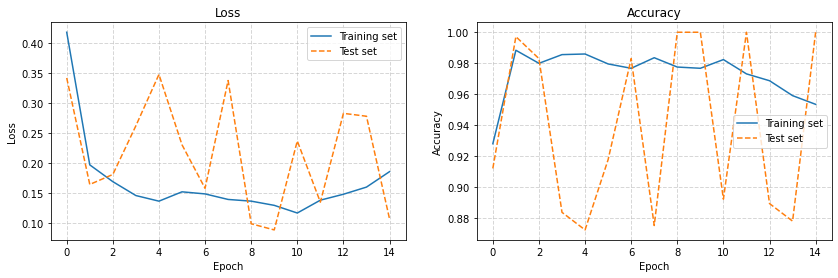

In [66]:
render_training_history(training_history)

In [67]:
training_history = vgg16.fit(
    x=dataset_train_augmented.repeat(),
    validation_data=dataset_test_shuffled.repeat(), 
    epochs=15,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    verbose=1
)

Epoch 1/15
78/78 [==============================] - 4s 46ms/step - loss: 0.7974 - accuracy: 0.7300 - val_loss: 0.4056 - val_accuracy: 0.8977
Epoch 2/15
78/78 [==============================] - 6s 73ms/step - loss: 0.6771 - accuracy: 0.7898 - val_loss: 0.2970 - val_accuracy: 0.9801
Epoch 3/15
78/78 [==============================] - 6s 74ms/step - loss: 0.5317 - accuracy: 0.8428 - val_loss: 0.2552 - val_accuracy: 0.9773
Epoch 4/15
78/78 [==============================] - 6s 71ms/step - loss: 0.5036 - accuracy: 0.8384 - val_loss: 0.3173 - val_accuracy: 0.9744
Epoch 5/15
78/78 [==============================] - 6s 72ms/step - loss: 0.5123 - accuracy: 0.8328 - val_loss: 0.5847 - val_accuracy: 0.8125
Epoch 6/15
78/78 [==============================] - 6s 71ms/step - loss: 0.4659 - accuracy: 0.8513 - val_loss: 0.1663 - val_accuracy: 0.9915
Epoch 7/15
78/78 [==============================] - 6s 74ms/step - loss: 0.4547 - accuracy: 0.8505 - val_loss: 0.2689 - val_accuracy: 0.9489
Epoch 8/15
78

In [68]:
# evaluate test images
test_loss, test_acc = vgg16.evaluate(x_test_norm, y_test, verbose=2)

134/134 - 4s - loss: 0.9641 - accuracy: 0.6966


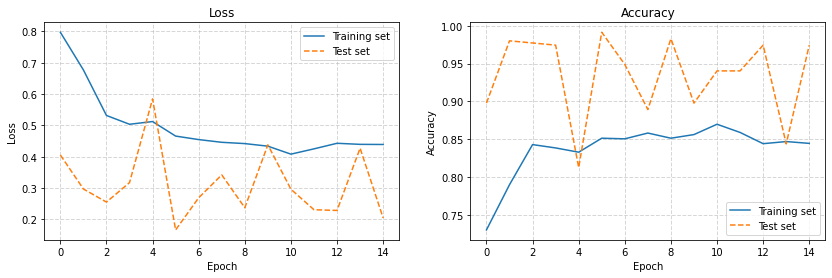

In [69]:
render_training_history(training_history)

In [80]:
import seaborn as sns
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report

y_pred_vgg16 = np.argmax(vgg16.predict(x_test_norm), axis=1) # 예측결과(각 샘플 당 3개) 중 가장 높은 값
                                                             # 이 값이 결국 클래스를 의미
_confusion_matrix_vgg16 = confusion_matrix(y_test, y_pred_vgg16) # Confusion Matrix 만들기
df_confusion_vgg16 = pd.DataFrame(_confusion_matrix_vgg16.numpy(),
                           columns=['rock', 'paper', 'scissor'],
                           index=['rock', 'paper', 'scissor'])

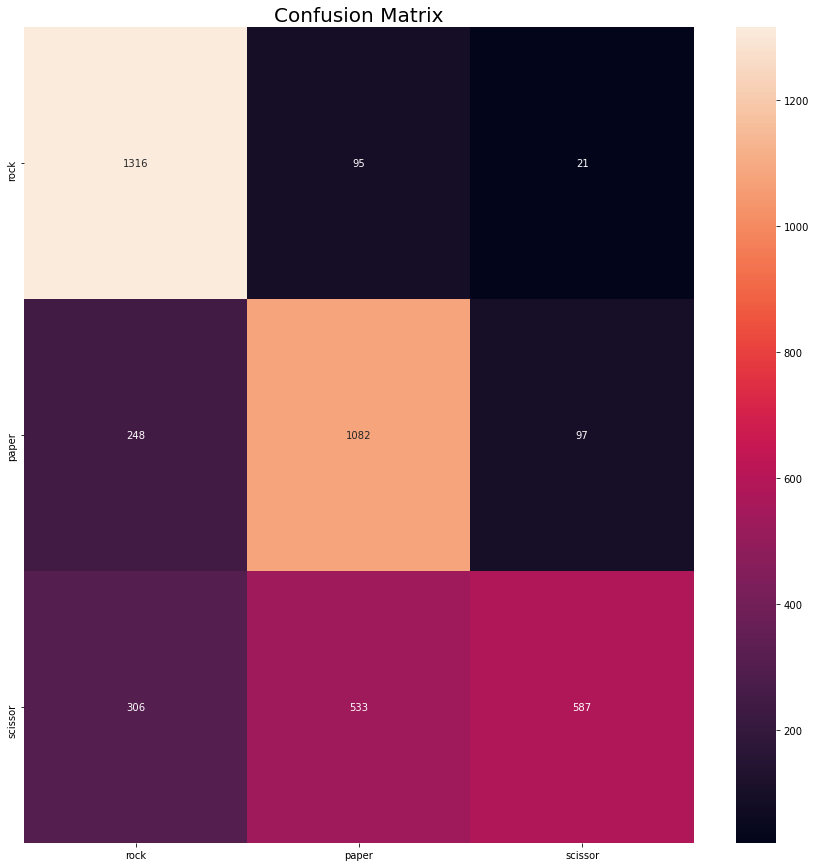

In [81]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_confusion_vgg16, annot=True, fmt='g') # Confusion Matrix를 heatmap으로 시각화
plt.title('Confusion Matrix', fontsize=20)
plt.show()

참고할만한 링크 : https://colab.research.google.com/github/trekhleb/machine-learning-experiments/blob/master/experiments/rock_paper_scissors_cnn/rock_paper_scissors_cnn.ipynb